NAME: Sumedha Zaware

ROLL NO.: BECOC342

### Assignment-1

#### Preprocessing

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("uber.csv")

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [5]:
df.shape

(200000, 9)

In [6]:
cln_df = df.drop('Unnamed: 0', axis=1)
cln_df = cln_df.drop('key', axis=1)

In [7]:
cln_df.shape

(200000, 7)

In [8]:
cln_df['month'] = cln_df['pickup_datetime']
cln_df.head()
cln_df.month = cln_df.month.str.slice(start=5, stop=7)
cln_df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,05
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,07
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,08
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,06
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,08


In [9]:
cln_df['hour'] = cln_df['pickup_datetime']
cln_df.hour = cln_df.hour.str.slice(start=11, stop=13)
cln_df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,hour
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,05,19
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,07,20
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,08,21
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,06,08
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,08,17


In [10]:
cln_df.drop('pickup_datetime', axis=1, inplace=True)
cln_df.shape

(200000, 8)

In [11]:
cln_df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
month                0
hour                 0
dtype: int64

In [12]:
cln_df.dropna(inplace=True)

In [13]:
cln_df.shape

(199999, 8)

In [14]:
cln_df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'month',
       'hour'],
      dtype='object')

In [15]:
cln_df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,05,19
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,07,20
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,08,21
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,06,08
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,08,17


#### Outlier Detection

In [16]:
import seaborn as sns
from matplotlib.cbook import boxplot_stats  

[-52.  -52.  -50.5 ... 275.  350.  499. ]
17166


C:\Users\nerfl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


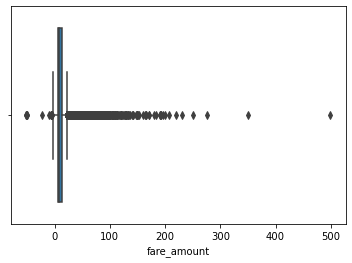

In [17]:
#Outliers for Fare Amount
fare_amt_outliers = boxplot_stats(cln_df.fare_amount)[0]['fliers']
fare_amt_outliers.sort()
sns.boxplot(cln_df['fare_amount'])
print(fare_amt_outliers)
print(len(fare_amt_outliers))

In [18]:
#remove outliers for fare amount
Q1 = cln_df['fare_amount'].quantile(0.25)
Q3 = cln_df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1  
filter = (cln_df['fare_amount'] >= Q1 - 1.5 * IQR) & (cln_df['fare_amount'] <= Q3 + 1.5 *IQR)
cln_df = cln_df.loc[filter]

In [19]:
cln_df.shape

(182833, 8)

In [20]:
#Outliers for latitudes and longitudes
#Any value out of [-90, 90] and [-180,180] will be invalid
def find_latitude_outliers(series):
    ans = []
    for i in series:
        if(i<-90 or i>90):
            ans.append(i)
    return ans

def find_longitude_outliers(series):
    ans = []
    for i in series:
        if(i<-180 or i>180):
            ans.append(i)
    return ans


pickup_longitude_outliers = find_longitude_outliers(cln_df['pickup_longitude'])
pickup_latitude_outliers = find_latitude_outliers(cln_df['pickup_latitude'])
dropoff_longitude_outliers = find_longitude_outliers(cln_df['dropoff_longitude'])
dropoff_latitude_outliers = find_latitude_outliers(cln_df['dropoff_latitude'])

print(len(pickup_longitude_outliers))
print(len(pickup_latitude_outliers))
print(len(dropoff_longitude_outliers))
print(len(dropoff_latitude_outliers))

6
4
3
3


[  4   4   4 ...   6   6 208]
20555


C:\Users\nerfl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(182832, 8)

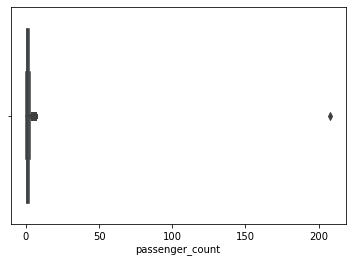

In [21]:
#Outliers for Passenger count 
passenger_count_outliers = boxplot_stats(cln_df.passenger_count)[0]['fliers']
passenger_count_outliers.sort()
sns.boxplot(cln_df['passenger_count'])
print(passenger_count_outliers)
print(len(passenger_count_outliers))

filter = cln_df['passenger_count']<=6
cln_df = cln_df.loc[filter]
cln_df.shape

In [22]:
correlation_matrix = cln_df.corr()

In [23]:
correlation_matrix

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.000368,0.002618,-0.002413,0.000588,0.012876
pickup_longitude,0.000368,1.000000,-0.812047,0.835950,-0.850574,-0.000695
pickup_latitude,0.002618,-0.812047,1.000000,-0.767103,0.684558,-0.001800
dropoff_longitude,-0.002413,0.835950,-0.767103,1.000000,-0.913949,0.000307
dropoff_latitude,0.000588,-0.850574,0.684558,-0.913949,1.000000,-0.001014
passenger_count,0.012876,-0.000695,-0.001800,0.000307,-0.001014,1.000000


<AxesSubplot:>

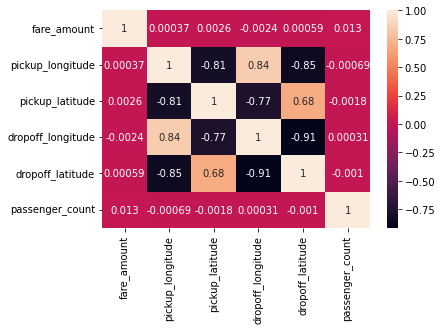

In [25]:
sns.heatmap(correlation_matrix, annot = True)

In [26]:
convert_dict = {'month': int, 'hour':int}
cln_df = cln_df.astype(convert_dict)

In [27]:
correlation_matrix = cln_df.corr()
correlation_matrix

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,hour
fare_amount,1.000000,0.000368,0.002618,-0.002413,0.000588,0.012876,0.026332,-0.013216
pickup_longitude,0.000368,1.000000,-0.812047,0.835950,-0.850574,-0.000695,-0.003948,0.003543
pickup_latitude,0.002618,-0.812047,1.000000,-0.767103,0.684558,-0.001800,0.004152,-0.004674
dropoff_longitude,-0.002413,0.835950,-0.767103,1.000000,-0.913949,0.000307,-0.003471,0.004026
dropoff_latitude,0.000588,-0.850574,0.684558,-0.913949,1.000000,-0.001014,0.003508,-0.003166
passenger_count,0.012876,-0.000695,-0.001800,0.000307,-0.001014,1.000000,0.008802,0.015058
month,0.026332,-0.003948,0.004152,-0.003471,0.003508,0.008802,1.000000,-0.002697
hour,-0.013216,0.003543,-0.004674,0.004026,-0.003166,0.015058,-0.002697,1.000000


<AxesSubplot:>

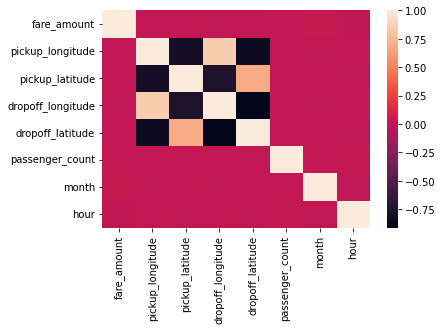

In [28]:
sns.heatmap(correlation_matrix)

#### Modeling

In [29]:
X = cln_df.iloc[:, 1:]
y = cln_df.iloc[:, 0]
print(X.shape, y.shape)

(182832, 7) (182832,)


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(155407, 7) (155407,) (27425, 7) (27425,)


#### Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [32]:
reg.score(X_test, y_test)

0.0005591699806782868

#### Distance

In [33]:
def haversine (lon_1, lon_2, lat_1, lat_2):
    lon_1, lon_2, lat_1, lat_2 = map(np.radians, [lon_1, lon_2, lat_1, lat_2])
    diff_lon = lon_2 - lon_1
    diff_lat = lat_2 - lat_1
    km = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 + np.cos(lat_1) * np.cos(lat_2) * np.sin(diff_lon/2.0)**2))
    return km

In [34]:
cln_df['distance']= haversine(cln_df['pickup_longitude'],cln_df['dropoff_longitude'],cln_df['pickup_latitude'],cln_df['dropoff_latitude'])

In [35]:
cln_df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,hour,distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,5,19,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,7,20,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,8,21,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,6,8,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,8,17,4.475450


In [36]:
correlation_matrix = cln_df.corr()
correlation_matrix

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,hour,distance
fare_amount,1.000000,0.000368,0.002618,-0.002413,0.000588,0.012876,0.026332,-0.013216,0.002485
pickup_longitude,0.000368,1.000000,-0.812047,0.835950,-0.850574,-0.000695,-0.003948,0.003543,0.098120
pickup_latitude,0.002618,-0.812047,1.000000,-0.767103,0.684558,-0.001800,0.004152,-0.004674,-0.049058
dropoff_longitude,-0.002413,0.835950,-0.767103,1.000000,-0.913949,0.000307,-0.003471,0.004026,0.039346
dropoff_latitude,0.000588,-0.850574,0.684558,-0.913949,1.000000,-0.001014,0.003508,-0.003166,-0.064900
passenger_count,0.012876,-0.000695,-0.001800,0.000307,-0.001014,1.000000,0.008802,0.015058,-0.000558
month,0.026332,-0.003948,0.004152,-0.003471,0.003508,0.008802,1.000000,-0.002697,-0.001406
hour,-0.013216,0.003543,-0.004674,0.004026,-0.003166,0.015058,-0.002697,1.000000,-0.002082
distance,0.002485,0.098120,-0.049058,0.039346,-0.064900,-0.000558,-0.001406,-0.002082,1.000000


<AxesSubplot:>

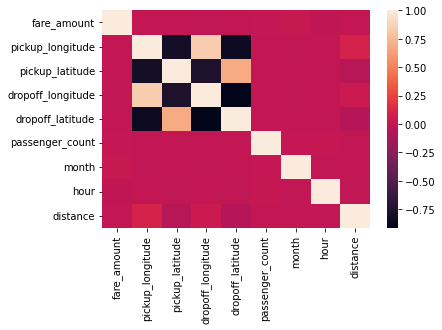

In [37]:
sns.heatmap(correlation_matrix)

Text(0, 0.5, 'fare_amount')

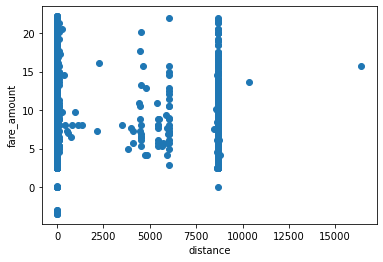

In [38]:
import matplotlib.pyplot as plt
plt.scatter(cln_df['distance'], cln_df['fare_amount'])
plt.xlabel("distance")
plt.ylabel("fare_amount")

[6.46348727e+00 6.46367005e+00 6.46368672e+00 ... 8.78289861e+03
 1.03215077e+04 1.64092391e+04]
8293


C:\Users\nerfl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


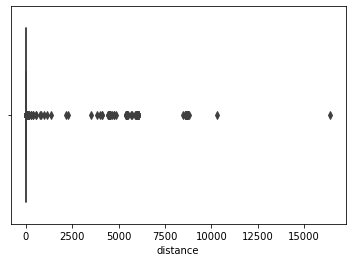

In [39]:
#Outliers for Distance 
distance_outliers = boxplot_stats(cln_df.distance)[0]['fliers']
distance_outliers.sort()
sns.boxplot(cln_df['distance'])
print(distance_outliers)
print(len(distance_outliers))

In [40]:
filter = (cln_df['distance']<=50) & (cln_df['distance']>0)
cln_df = cln_df.loc[filter]
cln_df.shape

(177297, 9)

Text(0, 0.5, 'fare_amount')

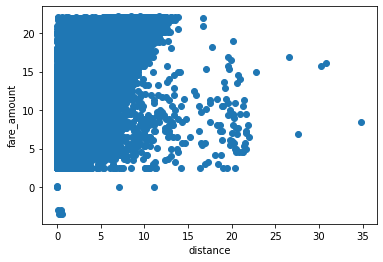

In [41]:
plt.scatter(cln_df['distance'], cln_df['fare_amount'])
plt.xlabel("distance")
plt.ylabel("fare_amount")

In [42]:
correlation_matrix = cln_df.corr()
correlation_matrix

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,hour,distance
fare_amount,1.000000,0.001213,-0.002011,0.002064,-0.002233,0.013791,0.026868,-0.013068,0.802780
pickup_longitude,0.001213,1.000000,-0.939822,0.999967,-0.993719,0.009919,-0.007060,0.002745,-0.010043
pickup_latitude,-0.002011,-0.939822,1.000000,-0.939845,0.945731,-0.010081,0.007026,-0.002997,0.021863
dropoff_longitude,0.002064,0.999967,-0.939845,1.000000,-0.993697,0.009941,-0.007068,0.002453,-0.009034
dropoff_latitude,-0.002233,-0.993719,0.945731,-0.993697,1.000000,-0.010204,0.007477,-0.002174,0.009246
passenger_count,0.013791,0.009919,-0.010081,0.009941,-0.010204,1.000000,0.008972,0.015403,0.001564
month,0.026868,-0.007060,0.007026,-0.007068,0.007477,0.008972,1.000000,-0.002962,0.005217
hour,-0.013068,0.002745,-0.002997,0.002453,-0.002174,0.015403,-0.002962,1.000000,-0.037489
distance,0.802780,-0.010043,0.021863,-0.009034,0.009246,0.001564,0.005217,-0.037489,1.000000


<AxesSubplot:>

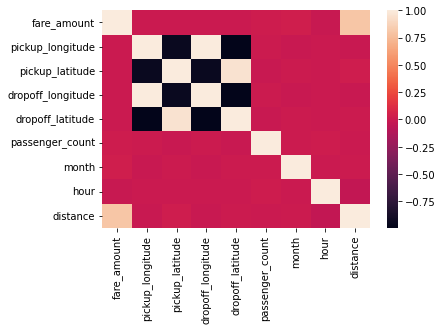

In [43]:
sns.heatmap(correlation_matrix)

#### Splitting and Training again

In [44]:
X = cln_df.iloc[:, 1:]
y = cln_df.iloc[:, 0]
print(X.shape, y.shape)

(177297, 8) (177297,)


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(150702, 8) (150702,) (26595, 8) (26595,)


In [46]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [47]:
reg.score(X_test, y_test)

0.6422766551294363

In [54]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 5 decision trees
rf = RandomForestRegressor(n_estimators = 10, random_state = 42)

# Train the model on training data
rf.fit(X_train, y_train);

In [55]:
rf.score(X_test, y_test)

0.7171227982919578

**Random Forest performs better at 71% versus linear at 64%**